In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.utils import shuffle

In [6]:
X_train = pd.read_csv("./data/X_train_text.csv")
X_submission = pd.read_csv("./data/X_test_text.csv")

In [7]:
X_train = X_train.drop(columns=['ProductId', 'UserId', 'Summary', 'Text', 'about', 'act', 'actor', 'after', 'again', 'all', 'also', 'an',
       'ani', 'are', 'as', 'at', 'back', 'be', 'becaus', 'been', 'befor', 'by', 'can', 'cast', 'charact',
       'come', 'could', 'did', 'do', 'doe', 'don', 'dvd', 'end', 'even', 'ever', 'feel', 'film', 'find', 'first', 'for',
       'from', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'her', 'here', 'high', 'him', 'his', 'how', 'if', 'in','into', 'is', 'it',
       'just', 'know', 'life', 'littl', 'look', 'lot', 'made', 'make', 'man', 'mani', 'me', 'more', 'most', 'movi', 'much', 'my', 'never',
       'new', 'now', 'of', 'off', 'on', 'one', 'onli', 'or', 'other', 'out', 'over', 'own', 'old', 'perform',
       'play', 'part', 'peopl', 'plot', 'realli', 'say', 'scene', 'see', 'seem', 'seen', 'seri', 'set', 'she', 'show', 'so', 'some', 'star', 'still', 'stori',
       'take', 'than', 'that', 'their', 'them', 'then', 'there', 'these',
       'they', 'thing', 'think', 'this', 'those', 'time', 'to', 'too', 'tri', 'two', 'up', 'use', 'veri', 'want', 'was', 'watch', 'way',
       'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'will', 'with', 'work', 'would', 'year', 'you', 'your'])
X_submission = X_submission.drop(columns=['ProductId', 'UserId', 'Score', 'Summary', 'Text', 'about', 'act', 'actor', 'after', 'again', 'all', 'also', 'an',
       'ani', 'are', 'as', 'at', 'back', 'be', 'becaus', 'been', 'befor', 'by', 'can', 'cast', 'charact',
       'come', 'could', 'did', 'do', 'doe', 'don', 'dvd', 'end', 'even', 'ever', 'feel', 'film', 'find', 'first', 'for',
       'from', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'her', 'here', 'high', 'him', 'his', 'how', 'if', 'in','into', 'is', 'it',
       'just', 'know', 'life', 'littl', 'look', 'lot', 'made', 'make', 'man', 'mani', 'me', 'more', 'most', 'movi', 'much', 'my', 'never',
       'new', 'now', 'of', 'off', 'on', 'one', 'onli', 'or', 'other', 'out', 'over', 'own', 'old', 'perform',
       'play', 'part', 'peopl', 'plot', 'realli', 'say', 'scene', 'see', 'seem', 'seen', 'seri', 'set', 'she', 'show', 'so', 'some', 'star', 'still', 'stori',
       'take', 'than', 'that', 'their', 'them', 'then', 'there', 'these',
       'they', 'thing', 'think', 'this', 'those', 'time', 'to', 'too', 'tri', 'two', 'up', 'use', 'veri', 'want', 'was', 'watch', 'way',
       'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'will', 'with', 'work', 'would', 'year', 'you', 'your'])
X_train.columns.values

array(['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
       'Time', 'bad', 'best', 'better', 'but', 'enjoy', 'fan', 'good',
       'great', 'interest', 'like', 'love', 'no', 'not', 'well',
       'ProductCode', 'UserCode'], dtype=object)

In [8]:
score_1 = X_train[X_train['Score'] == 1]
score_2 = X_train[X_train['Score'] == 2]
score_3 = X_train[X_train['Score'] == 3]
score_4 = X_train[X_train['Score'] == 4]
score_5 = X_train[X_train['Score'] == 5]
X_train_split = [score_1, score_2, score_3, score_4, score_5]

In [9]:
X_train, X_test_, Y_train, Y_test_ = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=0.2,
        random_state=0
    )

In [10]:
X_train_processed = X_train.drop(columns=['Id'])
X_test_processed = X_test_.drop(columns=['Id'])
model = LogisticRegression(n_jobs=4)
model.fit(X_train_processed, Y_train)

LogisticRegression(n_jobs=4)

In [11]:
accuracy = []
mse = []
Y_test_predictions = model.predict(X_test_processed)
score = accuracy_score(Y_test_, Y_test_predictions)
error = mean_squared_error(Y_test_, Y_test_predictions)
accuracy.append(score)
mse.append(error)
print("Accuracy on testing set = ", score)
print("MAE = ", error)

Accuracy on testing set =  0.5638034110058067
MAE =  1.6062495751448085


In [12]:
models = [LogisticRegression(n_jobs=4) for _ in range(5)]
for i in range(5):
    sample_num = (int)(len(X_train_split[i])/4)
    X_train = X_train_split[i].copy()
    for index in range(5):
        if not index == i:
            X_concat = X_train_split[index].sample(sample_num, replace=True)
            X_concat['Score'] = [0 for _ in range(len(X_concat))]
            X_train = pd.concat([X_train, X_concat], ignore_index=True)
    X_train = shuffle(X_train)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=0.2,
        random_state=0
    )
    X_train_processed = X_train.drop(columns=['Id'])
    X_test_processed = X_test.drop(columns=['Id'])
    models[i].fit(X_train_processed, Y_train)
    Y_test_predictions = models[i].predict(X_test_processed)
    score = accuracy_score(Y_test, Y_test_predictions)
    error = mean_squared_error(Y_test, Y_test_predictions)
    accuracy.append(score)
    mse.append(error)
    print("Accuracy on testing set = ", score)
    print("MAE = ", error)

Accuracy on testing set =  0.7447293114524324
MAE =  0.2552706885475676
Accuracy on testing set =  0.5998691799964322
MAE =  1.6005232800142712
Accuracy on testing set =  0.6068244558084808
MAE =  3.538579897723673
Accuracy on testing set =  0.662351962609419
MAE =  5.402368598249297
Accuracy on testing set =  0.7287514065262819
MAE =  6.781214836842952


In [13]:
accuracy

[0.5638034110058067,
 0.7447293114524324,
 0.5998691799964322,
 0.6068244558084808,
 0.662351962609419,
 0.7287514065262819]

In [14]:
def calculate(r):
    res = [0, 0, 0, 0, 0]
    for i, (p, acc) in enumerate(zip(r, accuracy)):
        p = int(p)
        if p != 0:
            res[p-1] += acc
        else:
            res = [x+acc for x in res]
            res[i-1] -= acc
    return res.index(max(res)) + 1

Accuracy on testing set =  0.534662817031416
MAE =  1.667654119574823


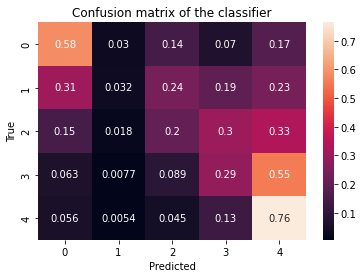

In [15]:
X_test_processed = X_test_.drop(columns=['Id'])

pred = {
    '0': model.predict(X_test_processed),
    '1': models[0].predict(X_test_processed),
    '2': models[1].predict(X_test_processed),
    '3': models[2].predict(X_test_processed),
    '4': models[3].predict(X_test_processed),
    '5': models[4].predict(X_test_processed),
}
pred = pd.DataFrame(pred, columns=['0', '1', '2', '3', '4', '5'])
pred['Score'] = pred.apply(lambda x: calculate(x), axis=1)
Y_test_predictions = pred['Score'].to_numpy()
print("Accuracy on testing set = ", accuracy_score(Y_test_, Y_test_predictions))
print("MAE = ", mean_squared_error(Y_test_, Y_test_predictions))

cm = confusion_matrix(Y_test_, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
X_submission_processed = X_submission.drop(columns=['Id'])

pred = {
    '0': model.predict(X_submission_processed),
    '1': models[0].predict(X_submission_processed),
    '2': models[1].predict(X_submission_processed),
    '3': models[2].predict(X_submission_processed),
    '4': models[3].predict(X_submission_processed),
    '5': models[4].predict(X_submission_processed),
}
pred = pd.DataFrame(pred)
X_submission['Score'] = pred.apply(lambda x: calculate(x), axis=1)

In [ ]:
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)